#Regresión Polinómica
La regresión polinómica es un tipo de regresión en la que se ajusta un modelo polinómico a los datos. La regresión polinomica puede ajustar curvas más complejas, como polinomios de grado superior.

## Ventajas y desventajas
### Ventajas
**Modelo más flexible:** Puede adaptarse a relaciones no lineales y capturar patrones más complejos en los datos

**Mayor poder predictivo:** Puede proporcionar predicciones más precisas cuando la relación es mejor representada por una curva
###Desventajas
**Riesgo de Overfitting:** con polinomios de grado alto, hay un riesgo de ajustar el modelo demasiado a los datos de entrenamiento y tener un redimiento deficiente con nuevos datos

**Menor interpretabilidad:** A medida que aumenta el grado del polinomio, el modelo se vuelve más complejo y menos interpretable

**Elección del grado del polinomio:** Determinar el grado adecuado del polinomio puede ser un desafío y puede requerir técnicas de validación del modelo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('/content/Advertising.csv')

In [5]:
# Creación del conjunto de datos
pos = [x for x in range(1,11)]
post = ["Pasante de Desarrollo",
 "Desarrollador Junior",
 "Desarrollador Intermedio",
 "Desarrollador Senior",
 "Líder de Proyecto",
 "Gerente de Proyecto",
 "Arquitecto de Software",
 "Director de Desarrollo",
 "Director de Tecnología",
 "Director Ejecutivo (CEO)"]
salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]


In [6]:
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

In [7]:
# Creación del conjunto
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

data = pd.DataFrame(data)
data.head()

,position,years,salary
0,Pasante de Desarrollo,1,1200.0
1,Desarrollador Junior,2,2500.0
2,Desarrollador Intermedio,3,4000.0
3,Desarrollador Senior,4,4800.0
4,Líder de Proyecto,5,6500.0


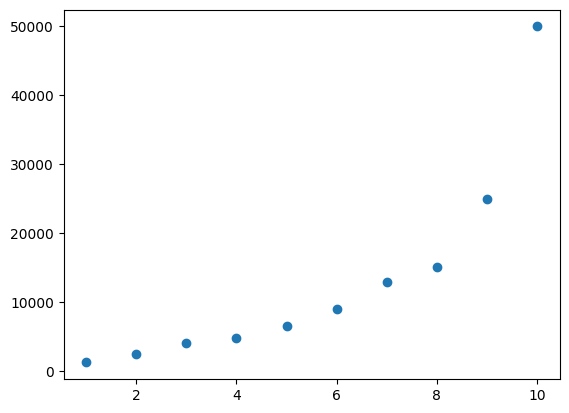

In [8]:
plt.scatter(data['years'],data['salary'])
plt.show()


Primero veo un modelo de regresion lineal para ver como predice yluego el de regresion polinomica apra ver como se ajuta de forma correcta el modelo

In [10]:
# Extracción del avariable dependiente e independiente
X = data.iloc[:, 1].values.reshape(-1,1)
y = data.iloc[:, -1].values

Para este problema no dividiremos el problema entre el conjunto de entrenamiento y el conjunto de testing ya que, como tenemos muy pocos datos, no será necesario dividir el conjunto.


In [11]:
# Crearemos un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [12]:
LinearRegression()


LinearRegression()

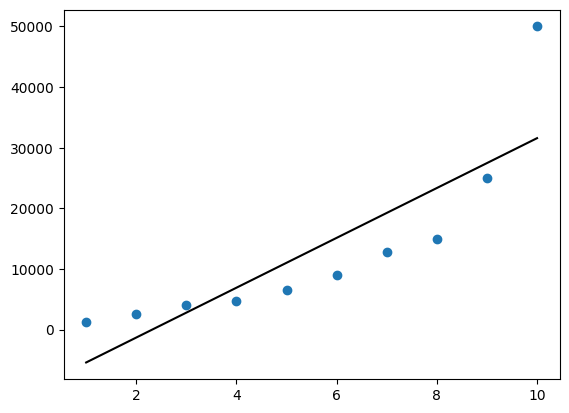

In [13]:
plt.scatter(data['years'], data['salary'])
plt.plot(X, regression.predict(X), color = "black")
plt.show()

In [14]:
regression.predict([[2]])


array([-1305.33333333])

Vemos como con los datos que tenemos utilizar un modelo de regresion lineal simple no es la mejor opción, por lo que ahora pasaremos a crear un modelo de regresión polinómica para ver si este tiene un mejor rendimiento con los datos que tenemos.



In [15]:
# Regresion Polinímica
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [16]:
# Para la creación del modelo polinómico seguimos utilizando la clase de regresión lineal.
regression_2 = LinearRegression()
regression_2.fit(X_poly, y)


LinearRegression()

In [17]:
LinearRegression()


LinearRegression()

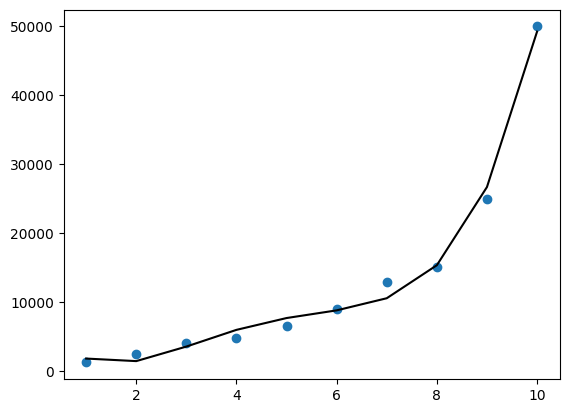

In [18]:
plt.scatter(X, y)
plt.plot(X, regression_2.predict(X_poly), color = "black")
plt.show()

In [19]:
predict = poly.fit_transform([[2]])
regression_2.predict(predict)

array([1398.34498834])

In [21]:
# R-Squared
from sklearn.metrics import r2_score

y_pred = regression_2.predict(X_poly)
r_squared = r2_score(y, y_pred)
r_squared

0.9933186366907111